# Question 1

In [279]:
import numpy as np
import math
import pylab as pl
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [280]:
def sigmoid(x):
  return 1 / (1 + math.exp(-x))


In [165]:
# Read the data file

data = pl.loadtxt('../DataFiles/HW2/data1_train.csv')
len(data[:,2])
Y = data[:,2]
X = data[:,0:2]
a=np.array([1.0]*len(Y))
#X[:,1]=a
np.c_[a, X]
#Y = 0.5*Y+ 0.5
#Y

array([[ 1.        , -1.38996032,  1.79306652],
       [ 1.        ,  1.90247515,  2.60464354],
       [ 1.        ,  2.05510976,  2.10402166],
       ..., 
       [ 1.        ,  1.91603707,  2.86698148],
       [ 1.        , -1.9750055 , -2.00444274],
       [ 1.        , -1.93536807, -2.01833244]])

In [296]:
# Assuming y's are +1 and -1 
def logisticRegression(weight,X,Y,lambda_shrink):
    
    #intercept=np.array([1.0]*len(Y))
    W = weight[1:]
    bias = weight[0]

    NLL = 0
    NLL_interceptGrad = 0
    NLL_weightGrad = [0]*len(W)
    
    for i in range(len(Y)):
        interm =np.exp(-Y[i]*(np.dot(W,X[i,])+bias))
        NLL+=math.log(1+interm)
        
        
        NLL_interceptGrad+=(-Y[i]*interm)/(1+interm)
        pointGradient = (X[i,]*(-Y[i]*interm))/(1+interm)
        #print pointGradient
        #b = [i**2,i**3]
        #a = [i+j for i,j in zip(a,b)]
        NLL_weightGrad = [i+j for i,j in zip(NLL_weightGrad,pointGradient)]
        #print NLL_weightGrad
   
    
    L2normSq = np.inner(W,np.transpose(W))
    
    shrinkage = lambda_shrink * L2normSq
    value = NLL+shrinkage
    #print value
    
    NLLGrad = np.append(NLL_interceptGrad,[NLL_weightGrad])
    shrinkGradient = [0]+ [2*lambda_shrink*a for a in W]
    Gradient = [a+b for a,b in  zip(NLLGrad,shrinkGradient)]
    #print NLLGrad
    #print shrinkGradient
    #print Gradient
    return(value,Gradient)


In [297]:
logisticRegression([2,-1,3],X,Y,1)

(29.08087796151574,
 [10.510538094375459, -33.094726806896091, -22.107943606352517])

In [262]:
def logisticRegression(weight,X,Y,lambda_shrink):
    intercept=np.array([1.0]*len(Y))
    #X[:,1]=a
    X = np.c_[intercept, X]
    W = weight
    interm = np.dot(X,np.transpose(W))
    sigm = map(sigmoid,interm)
   
    #print sum(map(math.log,map(sigmoid,interm)))
    Term1 =[a*b for a,b in zip(map(math.log,sigm),Y)] # elementwise product
    #print(sum(Term1))
    #print max(sigm)
    Term2 =[a*b for a,b in zip(map(math.log,[1-b for b in sigm]),[1-a for a in Y])] # elementwise product
    #print(sum(Term2))
    
    NLL = -1*(sum(Term1)+sum(Term2))
    L2normSq = np.inner(W[1:],np.transpose(W[1:]))
    #print L2normSq
    shirnkage = lambda_shrink * L2normSq
    value = NLL+L2normSq
    
    error = [a -b for a,b in zip(sigm,Y)]
    NLLgradient = np.dot(np.transpose(error),X)
    shrinkGradient = [0]+ [2*L2normSq*lambda_shrink*a for a in W[1:]]
    gradient = NLLgradient+shrinkGradient
    #print shrinkGradient
    #print NLLgradient
    return(value,gradient)
    

    
    #return(value,gradient)

In [267]:
logisticRegression([1,1,1],X,Y,0)

(184.58747026137976,
 [41.731552688814524, 208.30974941501378, -200.32307290844193])

In [291]:
def batchGradientDiscent(function,initGuess,step,threshold,maxIter,*args):
    gradientNorm = []
    epsilon = 1
    errorPropagation = []
    iteration = 0
    
    while epsilon > threshold and iteration < maxIter : 
        if iteration==0:
            
            value = [float(i) for i in initGuess]
        
        output = function(value,*args)
        evaluateOld = function(value,*args)[0] # function evaluated at old point
        gradient = [float(i) for i in output[1]]
        change = [a*step for a in gradient]
        #print change
        newValue = [a - b for a,b in zip(value,change)] #GDS equation
        #print newValue
        evaluateNew = function(newValue,*args)[0]# function evaluated at new point
        #print(evaluateNew)
        epsilon = abs(evaluateNew - evaluateOld)
        
        value = newValue
        gradient= function(value,*args)[1]
        gNorm = np.linalg.norm(gradient)
        gradientNorm.append(gNorm)
        
        errorPropagation.append(epsilon)
        iteration+=1
            
    return(gradientNorm, errorPropagation,value,iteration)

In [310]:
A  = batchGradientDiscent(logisticRegression,[0,0,0],0.0001,1e-8,20000,X,Y,0)
print A[2], A[3]

[2.219597373155883, -0.44587195186074013, 5.249862825191054] 20000


In [273]:
lista=[23,2]
listb=[2,32]
[a*b for a,b in zip(lista,listb)]

[46, 64]

In [302]:
#np.inner(A,np.transpose(A))

# 1.2 L1 Norm

In [274]:
# sklearn logistic regression
# Use lambda of 0,0.1,1,5. C is the inverse of lambda 
# Use both L1 and L2 regularization
# In order for there to be no regularization choose C to be a very large number
from sklearn import linear_model
logit = linear_model.LogisticRegression(penalty='l2', tol=0.0001, C=10000000, fit_intercept=True, intercept_scaling=1, max_iter=1000, multi_class='ovr')

In [133]:
data1_V = pl.loadtxt('../DataFiles/HW2/data1_validate.csv')
Y_V = data1_V[:,2]
X_V = data1_V[:,0:2]

Y_V = 0.5*Y_V+ 0.5

data1_Test = pl.loadtxt('../DataFiles/HW2/data1_test.csv')
Y_Test = data1_Test[:,2]
X_Test = data1_Test[:,0:2]

Y_Test = 0.5*Y_Test+ 0.5

In [134]:
data2 = pl.loadtxt('../DataFiles/HW2/data2_train.csv')

Y2 = data2[:,2]
X2 = data2[:,0:2]
a=np.array([1.0]*len(Y))
#X[:,1]=a
#np.c_[a, X]
Y2 = 0.5*Y2+ 0.5

data2_V = pl.loadtxt('../DataFiles/HW2/data2_validate.csv')
Y2_V = data2_V[:,2]
X2_V = data2_V[:,0:2]
Y2_V = 0.5*Y2_V+ 0.5

data2_Test = pl.loadtxt('../DataFiles/HW2/data2_test.csv')
Y2_Test = data2_Test[:,2]
X2_Test = data2_Test[:,0:2]

Y2_Test = 0.5*Y2_Test+ 0.5

In [116]:
data3 = pl.loadtxt('../DataFiles/HW2/data3_train.csv')

Y3 = data3[:,2]
X3 = data3[:,0:2]
a=np.array([1.0]*len(Y))
#X[:,1]=a
#np.c_[a, X]
Y3 = 0.5*Y3+ 0.5

data3_V = pl.loadtxt('../DataFiles/HW2/data3_validate.csv')
Y3_V = data3_V[:,2]
X3_V = data3_V[:,0:2]
Y3_V = 0.5*Y3_V+ 0.5

data3_Test = pl.loadtxt('../DataFiles/HW2/data3_test.csv')
Y3_Test = data3_Test[:,2]
X3_Test = data3_Test[:,0:2]

Y3_Test = 0.5*Y3_Test+ 0.5

In [135]:
data4 = pl.loadtxt('../DataFiles/HW2/data4_train.csv')
Y4 = data4[:,2]
X4 = data4[:,0:2]
a=np.array([1.0]*len(Y))
Y4 = 0.5*Y4+ 0.5

data4_V = pl.loadtxt('../DataFiles/HW2/data4_validate.csv')
Y4_V = data4_V[:,2]
X4_V = data4_V[:,0:2]
Y4_V = 0.5*Y4_V+ 0.5

data4_Test = pl.loadtxt('../DataFiles/HW2/data4_test.csv')
Y4_Test = data4_Test[:,2]
X4_Test = data4_Test[:,0:2]

Y4_Test = 0.5*Y4_Test+ 0.5

In [307]:
logit = linear_model.LogisticRegression(penalty='l2', tol=0.0001, C=1, fit_intercept=True, intercept_scaling=1, max_iter=1000, multi_class='ovr')
logit0 = linear_model.LogisticRegression(penalty='l2', tol=0.0001, C=10000000, fit_intercept=True, intercept_scaling=1, max_iter=1000, multi_class='ovr')

In [308]:
# Check the answer for part (a) vias sklearn implementation 
a = logit.fit(X,Y)
print a.intercept_,a.coef_
b = logit0.fit(X,Y)
print b.intercept_,b.coef_

[ 1.13829764] [[-0.18293729  3.36791697]]
[ 6.15181078] [[ -1.21604045  11.73473535]]


In [92]:
logit_0 = linear_model.LogisticRegression(penalty='l2', tol=0.0001, C=10000000, fit_intercept=True, intercept_scaling=1, max_iter=10000, multi_class='ovr')
logit_0_1 = linear_model.LogisticRegression(penalty='l2', tol=0.0001, C=10, fit_intercept=True, intercept_scaling=1, max_iter=10000, multi_class='ovr')
logit_1 = linear_model.LogisticRegression(penalty='l2', tol=0.0001, C=1, fit_intercept=True, intercept_scaling=1, max_iter=10000, multi_class='ovr')
logit_5 = linear_model.LogisticRegression(penalty='l2', tol=0.0001, C=0.2, fit_intercept=True, intercept_scaling=1, max_iter=10000, multi_class='ovr')


In [277]:
model_0_set1 = logit_0.fit(X,Y)
print model_0_set1.coef_,model_0_set1.intercept_
print sum(abs(Y_V - model_0_set1.predict(X_V)))

model_0_set2 = logit_0.fit(X2,Y2)

print sum(abs(Y2_V - model_0_set2.predict(X2_V)))


model_0_set3 = logit_0.fit(X3,Y3)
print model_0_set3.coef_,model_0_set3.intercept_
print sum(abs(Y3_V - model_0_set3.predict(X3_V)))

model_0_set4 = logit_0.fit(X4,Y4)
print model_0_set4.coef_,model_0_set4.intercept_
print sum(abs(Y4_V - model_0_set4.predict(X4_V)))
#model_0_set1.coef_

[[ -1.21604045  11.73473535]] [ 6.15181078]
97.0
35.0
[[ -0.45997313  13.61612131]] [-6.63692952]
7.0
[[-0.02473662 -0.02372561]] [ 0.00059689]
203.0


In [278]:
model_0_1_set1 = logit_0_1.fit(X,Y)
print model_0_1_set1.coef_,model_0_1_set1.intercept_
print sum(abs(Y_V - model_0_1_set1.predict(X_V)))

model_0_1_set2 = logit_0_1.fit(X2,Y2)
print model_0_1_set2.coef_,model_0_set2.intercept_
print sum(abs(Y2_V - model_0_1_set2.predict(X2_V)))


model_0_1_set3 = logit_0_1.fit(X3,Y3)
print model_0_1_set3.coef_,model_0_1_set3.intercept_
print sum(abs(Y3_V - model_0_1_set3.predict(X3_V)))

model_0_1_set4 = logit_0_1.fit(X4,Y4)
print model_0_1_set4.coef_,model_0_1_set4.intercept_
print sum(abs(Y4_V - model_0_1_set4.predict(X4_V)))

[[-0.46420343  5.30635537]] [ 2.37552442]
97.0
[[ 1.81888558  0.00221756]] [ 0.00059689]
35.0
[[-0.30901382  8.72763494]] [-3.76774254]
7.0
[[-0.02473148 -0.02372077]] [ 0.00059616]
203.0


In [129]:
model_1_set1 = logit_1.fit(X,Y)
print model_1_set1.coef_,model_1_set1.intercept_
print sum(abs(Y_V - model_1_set1.predict(X_V)))

model_1_set2 = logit_1.fit(X2,Y2)
print model_1_set2.coef_,model_1_set2.intercept_
print sum(abs(Y2_V - model_1_set2.predict(X2_V)))


model_1_set3 = logit_1.fit(X3,Y3)
print model_1_set3.coef_,model_1_set3.intercept_
print sum(abs(Y3_V - model_1_set3.predict(X3_V)))

model_1_set4 = logit_1.fit(X4,Y4)
print model_1_set4.coef_,model_1_set4.intercept_
print sum(abs(Y4_V - model_1_set4.predict(X4_V)))

[[-0.18293729  3.36791697]] [ 1.13829764]
0.0
[[  1.76833368e+00   1.24387569e-03]] [ 0.1689112]
35.0
[[-0.20814065  4.8715839 ]] [-1.50894762]
6.0
[[-0.02468524 -0.02367728]] [ 0.00058969]
203.0


In [130]:
model_5_set1 = logit_5.fit(X,Y)
print model_5_set1.coef_,model_5_set1.intercept_
print sum(abs(Y_V - model_5_set1.predict(X_V)))

model_5_set2 = logit_5.fit(X2,Y2)
print model_5_set2.coef_,model_5_set2.intercept_
print sum(abs(Y2_V - model_5_set2.predict(X2_V)))


model_5_set3 = logit_5.fit(X3,Y3)
print model_5_set3.coef_,model_5_set3.intercept_
print sum(abs(Y3_V - model_5_set3.predict(X3_V)))

model_5_set4 = logit_5.fit(X4,Y4)
print model_5_set4.coef_,model_5_set4.intercept_
print sum(abs(Y4_V - model_5_set4.predict(X4_V)))

[[-0.05039288  2.33832383]] [ 0.52844858]
0.0
[[ 1.5944777  -0.00223635]] [ 0.12920157]
36.0
[[-0.16620239  3.08970206]] [-0.61438656]
10.0
[[-0.02448184 -0.0234859 ]] [ 0.00056233]
203.0


Weight from these model fits (L2)

SyntaxError: can't assign to operator (<ipython-input-132-5043254c1aa3>, line 1)

In [70]:
print model_0_1_set1.coef_,model_0_1_set1.intercept_
print model_0_1_set2.coef_,model_0_1_set2.intercept_
print model_0_1_set3.coef_,model_0_1_set3.intercept_
print model_0_1_set4.coef_,model_0_1_set4.intercept_

[[-0.02473148 -0.02372077]] [ 0.00059616]
[[-0.02473148 -0.02372077]] [ 0.00059616]
[[-0.02473148 -0.02372077]] [ 0.00059616]
[[-0.02473148 -0.02372077]] [ 0.00059616]


In [37]:
logit_1 = linear_model.LogisticRegression(penalty='l2', tol=0.0001, C=1, fit_intercept=True, intercept_scaling=1, max_iter=1000, multi_class='ovr')

In [38]:
logit_5 = linear_model.LogisticRegression(penalty='l2', tol=0.0001, C=0.2, fit_intercept=True, intercept_scaling=1, max_iter=1000, multi_class='ovr')

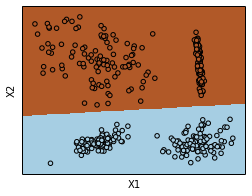

In [449]:
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logit.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

In [450]:
sum(abs(logit.predict(X) - Y))

0.0

L1 regularization

In [136]:
logit_0_L1 = linear_model.LogisticRegression(penalty='l1', tol=0.0001, C=1000000, fit_intercept=True, intercept_scaling=1, max_iter=1000, multi_class='ovr')
logit_0_1_L1 = linear_model.LogisticRegression(penalty='l1', tol=0.0001, C=10, fit_intercept=True, intercept_scaling=1, max_iter=1000, multi_class='ovr')
logit_1_L1 = linear_model.LogisticRegression(penalty='l1', tol=0.0001, C=1, fit_intercept=True, intercept_scaling=1, max_iter=1000, multi_class='ovr')
logit_5_L1 = linear_model.LogisticRegression(penalty='l1', tol=0.0001, C=0.2, fit_intercept=True, intercept_scaling=1, max_iter=1000, multi_class='ovr')

In [139]:
model_0_set1 = logit_0_L1.fit(X,Y)
print model_0_set1.coef_,model_0_set1.intercept_
print sum(abs(Y_V - model_0_set1.predict(X_V)))

model_0_set2 = logit_0_L1.fit(X2,Y2)
print model_0_set2.coef_,model_0_set2.intercept_
print sum(abs(Y2_V - model_0_set2.predict(X2_V)))


model_0_set3 = logit_0_L1.fit(X3,Y3)
print model_0_set3.coef_,model_0_set3.intercept_
print sum(abs(Y3_V - model_0_set3.predict(X3_V)))

model_0_set4 = logit_0_L1.fit(X4,Y4)
print model_0_set4.coef_,model_0_set4.intercept_
print sum(abs(Y4_V - model_0_set4.predict(X4_V)))

[[ -1.13745471  12.04669211]] [ 5.77278493]
0.0
[[ 1.82482011  0.00235979]] [ 0.1824777]
35.0
[[ -0.45854063  13.56278746]] [-6.60635557]
7.0
[[-0.02473447 -0.02372554]] [ 0.00059673]
203.0


In [141]:
model_0_1_set1 = logit_0_1_L1.fit(X,Y)
print model_0_1_set1.coef_,model_0_1_set1.intercept_
print sum(abs(Y_V - model_0_1_set1.predict(X_V)))

model_0_1_set2 = logit_0_1_L1.fit(X2,Y2)
print model_0_1_set2.coef_,model_0_set2.intercept_
print sum(abs(Y2_V - model_0_1_set2.predict(X2_V)))


model_0_1_set3 = logit_0_L1.fit(X3,Y3)
print model_0_1_set3.coef_,model_0_1_set3.intercept_
print sum(abs(Y3_V - model_0_1_set3.predict(X3_V)))

model_0_1_set4 = logit_0_1_L1.fit(X4,Y4)
print model_0_1_set4.coef_,model_0_1_set4.intercept_
print sum(abs(Y4_V - model_0_1_set4.predict(X4_V)))

[[-0.60049716  7.2022315 ]] [ 3.31867562]
0.0
[[  1.82071260e+00   1.43898409e-03]] [ 0.00059673]
35.0
[[ -0.45866772  13.5676129 ]] [-6.60911777]
7.0
[[-0.02452048 -0.02352479]] [ 0.]
201.0


In [142]:
model_1_set1 = logit_1_L1.fit(X,Y)
print model_1_set1.coef_,model_1_set1.intercept_
print sum(abs(Y_V - model_1_set1.predict(X_V)))

model_1_set2 = logit_1_L1.fit(X2,Y2)
print model_1_set2.coef_,model_1_set2.intercept_
print sum(abs(Y2_V - model_1_set2.predict(X2_V)))


model_1_set3 = logit_1_L1.fit(X3,Y3)
print model_1_set3.coef_,model_1_set3.intercept_
print sum(abs(Y3_V - model_1_set3.predict(X3_V)))

model_1_set4 = logit_1_L1.fit(X4,Y4)
print model_1_set4.coef_,model_1_set4.intercept_
print sum(abs(Y4_V - model_1_set4.predict(X4_V)))

[[-0.18968351  4.36955126]] [ 1.49649996]
0.0
[[ 1.78687386  0.        ]] [ 0.15679343]
35.0
[[-0.18836384  7.76186514]] [-3.13979791]
7.0
[[-0.02264508 -0.02169262]] [ 0.]
201.0


In [143]:
model_5_set1 = logit_5_L1.fit(X,Y)
print model_5_set1.coef_,model_5_set1.intercept_
print sum(abs(Y_V - model_5_set1.predict(X_V)))

model_5_set2 = logit_5_L1.fit(X2,Y2)
print model_5_set2.coef_,model_5_set2.intercept_
print sum(abs(Y2_V - model_5_set2.predict(X2_V)))


model_5_set3 = logit_5_L1.fit(X3,Y3)
print model_5_set3.coef_,model_5_set3.intercept_
print sum(abs(Y3_V - model_5_set3.predict(X3_V)))

model_5_set4 = logit_5_L1.fit(X4,Y4)
print model_5_set4.coef_,model_5_set4.intercept_
print sum(abs(Y4_V - model_5_set4.predict(X4_V)))

[[ 0.         2.9325021]] [ 0.2621098]
0.0
[[ 1.65301832  0.        ]] [ 0.05868092]
37.0
[[ 0.          4.39487111]] [-1.0697686]
8.0
[[-0.01432705 -0.01355169]] [ 0.]
203.0


In [23]:
model3 = logit.fit(X3,Y3)

print model3.coef_
print model3.intercept_
print model3.predict_proba

[[-0.22740846  5.86810997]]
[-2.07779145]
<bound method LogisticRegression.predict_proba of LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)>


In [26]:
model4 = logit.fit(X4,Y4)

print model4.coef_
print model4.intercept_
print model4.predict_proba

[[-0.02471091 -0.02370142]]
[ 0.00059327]
<bound method LogisticRegression.predict_proba of LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)>


# Question 2

In [2]:
import numpy as np
#import cvxopt
from cvxopt import matrix, solvers

In [3]:
# define your matrices
P = matrix(...)
q = matrix(...)
G = matrix(...)
h = matrix(...)
A = matrix(...)
b = matrix(...)
# find the solution	
solution = solvers.qp(P, q, G, h, A, b)
xvals = np.array(solution['x'])

SyntaxError: invalid syntax (<ipython-input-3-d3646c33714f>, line 2)

# 2.2

In [ ]:
from numpy import *
from plotBoundary import *
import pylab as pl
# import your SVM training code

# parameters
name = 'ls'
print '======Training======'
# load data from csv files
train = loadtxt('data/data'+name+'_train.csv')
# use deep copy here to make cvxopt happy
X = train[:, 0:2].copy()
Y = train[:, 2:3].copy()

# Carry out training, primal and/or dual
### TODO ###
# Define the predictSVM(x) function, which uses trained parameters
### TODO ###

# plot training results
plotDecisionBoundary(X, Y, predictSVM, [-1, 0, 1], title = 'SVM Train')


print '======Validation======'
# load data from csv files
validate = loadtxt('data/data'+name+'_validate.csv')
X = validate[:, 0:2]
Y = validate[:, 2:3]
# plot validation results
plotDecisionBoundary(X, Y, predictSVM, [-1, 0, 1], title = 'SVM Validate')
pl.show()


In [193]:
a = [0,1]

for i in range(10):
    b = [i**2,i**3]
    a = [i+j for i,j in zip(a,b)]
    print a

[0, 1]
[1, 2]
[5, 10]
[14, 37]
[30, 101]
[55, 226]
[91, 442]
[140, 785]
[204, 1297]
[285, 2026]


In [190]:
[0,1]+[2,3]


[0, 1, 2, 3]

# Question 4

In [335]:
# Generating Train, Test and Validation set for this question

MNISTData_0 = pl.loadtxt('../DataFiles/HW2/mnist_digit_0.csv')
MNISTData_0_Train =MNISTData_0[:200,]
MNISTData_0_Valid =MNISTData_0[201:351,]
MNISTData_0_Test =MNISTData_0[351:501,]

MNISTData_1 = pl.loadtxt('../DataFiles/HW2/mnist_digit_1.csv')
MNISTData_1_Train =MNISTData_1[:200,]
MNISTData_1_Valid =MNISTData_1[201:351,]
MNISTData_1_Test =MNISTData_1[351:501,]

MNISTData_2 = pl.loadtxt('../DataFiles/HW2/mnist_digit_2.csv')
MNISTData_2_Train =MNISTData_2[:200,]
MNISTData_2_Valid =MNISTData_2[201:351,]
MNISTData_2_Test =MNISTData_2[351:501,]

MNISTData_3 = pl.loadtxt('../DataFiles/HW2/mnist_digit_3.csv')
MNISTData_3_Train =MNISTData_3[:200,]
MNISTData_3_Valid =MNISTData_3[201:351,]
MNISTData_3_Test =MNISTData_3[351:501,]

MNISTData_4 = pl.loadtxt('../DataFiles/HW2/mnist_digit_4.csv')
MNISTData_4_Train =MNISTData_4[:200,]
MNISTData_4_Valid =MNISTData_4[201:351,]
MNISTData_4_Test =MNISTData_4[351:501,]

MNISTData_5 = pl.loadtxt('../DataFiles/HW2/mnist_digit_5.csv')
MNISTData_5_Train =MNISTData_5[:200,]
MNISTData_5_Valid =MNISTData_5[201:351,]
MNISTData_5_Test =MNISTData_5[351:501,]

MNISTData_6 = pl.loadtxt('../DataFiles/HW2/mnist_digit_6.csv')
MNISTData_6_Train =MNISTData_6[:200,]
MNISTData_6_Valid =MNISTData_6[201:351,]
MNISTData_6_Test =MNISTData_6[351:501,]

MNISTData_7 = pl.loadtxt('../DataFiles/HW2/mnist_digit_7.csv')
MNISTData_7_Train =MNISTData_7[:200,]
MNISTData_7_Valid =MNISTData_7[201:351,]
MNISTData_7_Test =MNISTData_7[351:501,]

MNISTData_8 = pl.loadtxt('../DataFiles/HW2/mnist_digit_8.csv')
MNISTData_8_Train =MNISTData_8[:200,]
MNISTData_8_Valid =MNISTData_8[201:351,]
MNISTData_8_Test =MNISTData_8[351:501,]

MNISTData_9 = pl.loadtxt('../DataFiles/HW2/mnist_digit_9.csv')
MNISTData_9_Train =MNISTData_9[:200,]
MNISTData_9_Valid =MNISTData_9[201:351,]
MNISTData_9_Test =MNISTData_9[351:501,]

In [336]:
MNISTData_0_Test.shape


(150, 784)